# Load the dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [4]:
iris = load_iris()

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
X = iris.data
y = iris.target

In [8]:
X.shape[0]

150

In [9]:
X.shape[1]

4

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
df = pd.DataFrame(X, columns = iris.feature_names)

In [14]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20
...,...,...,...,...
145,6.70,3.00,5.20,2.30
146,6.30,2.50,5.00,1.90
147,6.50,3.00,5.20,2.00
148,6.20,3.40,5.40,2.30


- Statistical description of the dataset

In [15]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [21]:
df.shape

(150, 4)

# Model

- Split the dataset to train and test sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
X_train.shape

(100, 4)

In [19]:
X_test.shape

(50, 4)

- We fit the model with max_leaf_nodes=7 on the train set:

In [49]:
clf = DecisionTreeClassifier(max_leaf_nodes=7, random_state=0)

In [50]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=7, random_state=0)

In [51]:
y_predict=clf.predict(X_train)

# Evaluate the model

- on Training dataset

In [52]:
print(clf.score(X_train,y_train))
print(accuracy_score(y_train,y_predict))


0.98
0.98


- on testing dataset

In [53]:
y_predict=clf.predict(X_test)
print(clf.score(X_test,y_test))
print(accuracy_score(y_test,y_predict))

0.98
0.98


# Visualize the structure of the tree

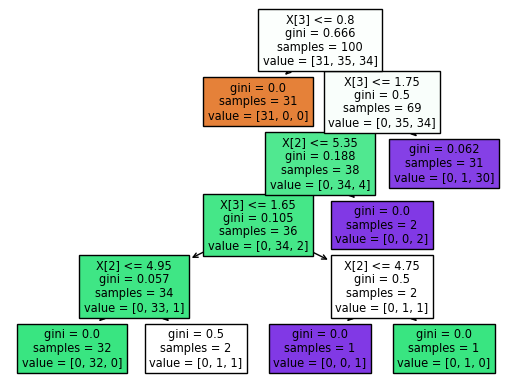

<Figure size 1200x800 with 0 Axes>

In [55]:
tree.plot_tree(clf, filled=True)
plt.figure(figsize=(12,8))
plt.show()

# Hyper-parameters Tuning

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
X = iris.data
y = iris.target

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #(25% default)

In [59]:
parameters = {'max_depth':[2,3,4,5,6],
'min_samples_leaf':[10,5,1],'max_leaf_nodes':[3,4,5,7,10]}

In [60]:
dt = DecisionTreeClassifier()

In [61]:
clf = GridSearchCV(dt, parameters)

In [62]:
clf.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_leaf_nodes': [3, 4, 5, 7, 10],
                         'min_samples_leaf': [10, 5, 1]})

- Want to check best parameter from algorithm

In [63]:
best_params=clf.best_params_
best_params

{'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_leaf': 1}

- The score corresponding to these best parameters :

In [65]:
clf.best_score_

0.9644268774703558

- Here is the best classifier

In [66]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4)

# Fit the best estimator, Predict and Evaluate

- On training sample

In [68]:
clf_best = clf.best_estimator_
clf_best.fit(X_train,y_train)
clf_best.score(X_train,y_train)

0.9821428571428571

- On testing sample

In [69]:
y_predict=clf_best.predict(X_test)
print(clf_best.score(X_test,y_test))
print(accuracy_score(y_test,y_predict))

0.9736842105263158
0.9736842105263158


-  structure of this best classifier

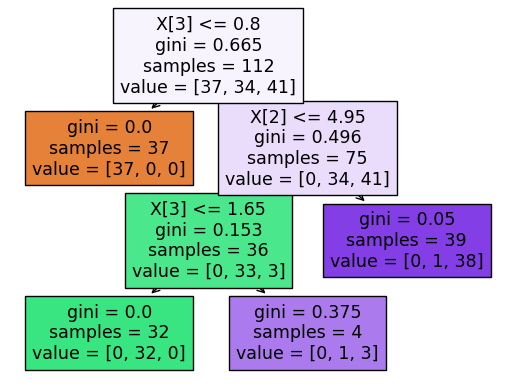

<Figure size 1200x800 with 0 Axes>

In [70]:
tree.plot_tree(clf_best, filled=True)
plt.figure(figsize=(12,8))
plt.show()